# 2.3 Random Forest: Maastricht

# Import Libraries and Data

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

2025-03-27 09:48:23.461454: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
#Import unscaled weather dataset
df_weather = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Supervised/weather_cleaned.csv')

In [9]:
df_weather.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,1960-01-01
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,1960-01-02
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,1960-01-03
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,1960-01-04
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,1960-01-05


In [11]:
df_weather.shape

(22950, 136)

In [13]:
#Import Prediction Data Set
df_answers = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Supervised/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [15]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df_answers.shape

(22950, 16)

# Data Wrangling & Prep

In [24]:
#Create data subset for 'MAASTRICHT'
maastricht_list = list(df_weather for df_weather in df_weather.columns if df_weather.find('MAASTRICHT') >=0)
maastricht_list

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

In [26]:
#Create a dataframe with the 'MAASTRICHT' columns
df_maastricht = df_weather[maastricht_list]
df_maastricht

,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max
0,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1
1,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9
2,7,0.97,1.0167,0.12,0.46,0.0,6.9,5.5,9.9
3,7,0.89,1.0277,0.16,0.00,0.3,7.0,3.0,10.0
4,7,0.92,1.0259,0.12,0.56,0.0,8.1,2.5,11.1
...,...,...,...,...,...,...,...,...,...
22945,8,0.67,1.0201,1.17,0.20,5.3,18.6,14.1,22.6
22946,7,0.70,1.0190,1.17,0.20,5.0,18.9,15.8,23.5
22947,8,0.69,1.0183,1.17,0.20,3.2,18.2,13.7,24.3
22948,8,0.73,1.0181,1.17,0.20,6.8,16.3,12.8,21.4


In [28]:
#Reduce answers dataset to 'MAASTRICHT'
answers_maastricht = df_answers['MAASTRICHT_pleasant_weather']
answers_maastricht

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MAASTRICHT_pleasant_weather, Length: 22950, dtype: int64

In [30]:
df_maastricht.shape

(22950, 9)

In [32]:
answers_maastricht.shape

(22950,)

# Shaping the Data for Modeling

In [37]:
X2 = df_maastricht

In [39]:
y2 = answers_maastricht

In [41]:
#Turn X2 and y2 from df to arrays
X = np.array(X2)
y = np.array(y2)

# Splitting the Data

In [44]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [48]:
X_train

array([[  3.    ,   0.71  ,   1.0144, ...,  17.7   ,  11.1   ,  23.    ],
       [  4.    ,   0.76  ,   1.0171, ...,  -3.8   ,  -8.    ,   0.4   ],
       [  5.    ,   0.92  ,   1.0108, ...,  -6.1   , -11.    ,  -3.1   ],
       ...,
       [  7.    ,   0.88  ,   1.0096, ...,   7.3   ,   3.5   ,   9.1   ],
       [  6.    ,   0.77  ,   1.0134, ...,  10.4   ,   8.4   ,  14.1   ],
       [  1.    ,   0.69  ,   1.0245, ...,   7.6   ,   2.8   ,  12.6   ]])

In [50]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [52]:
X_test

array([[ 4.    ,  0.8   ,  1.0166, ..., 12.2   ,  7.9   , 18.2   ],
       [ 8.    ,  0.73  ,  1.0063, ...,  2.7   ,  0.5   ,  5.6   ],
       [ 6.    ,  0.86  ,  1.0083, ..., 16.9   , 15.3   , 18.5   ],
       ...,
       [ 1.    ,  0.86  ,  1.0121, ..., 11.5   ,  5.9   , 19.4   ],
       [ 7.    ,  0.82  ,  1.0266, ...,  7.    ,  5.3   ,  9.8   ],
       [ 7.    ,  0.86  ,  1.0207, ..., 11.1   ,  7.    , 13.5   ]])

In [54]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

# Random Forest Model: Maastricht

In [57]:
#Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
#Training the model on the training dataset
#Fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
#Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
#Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


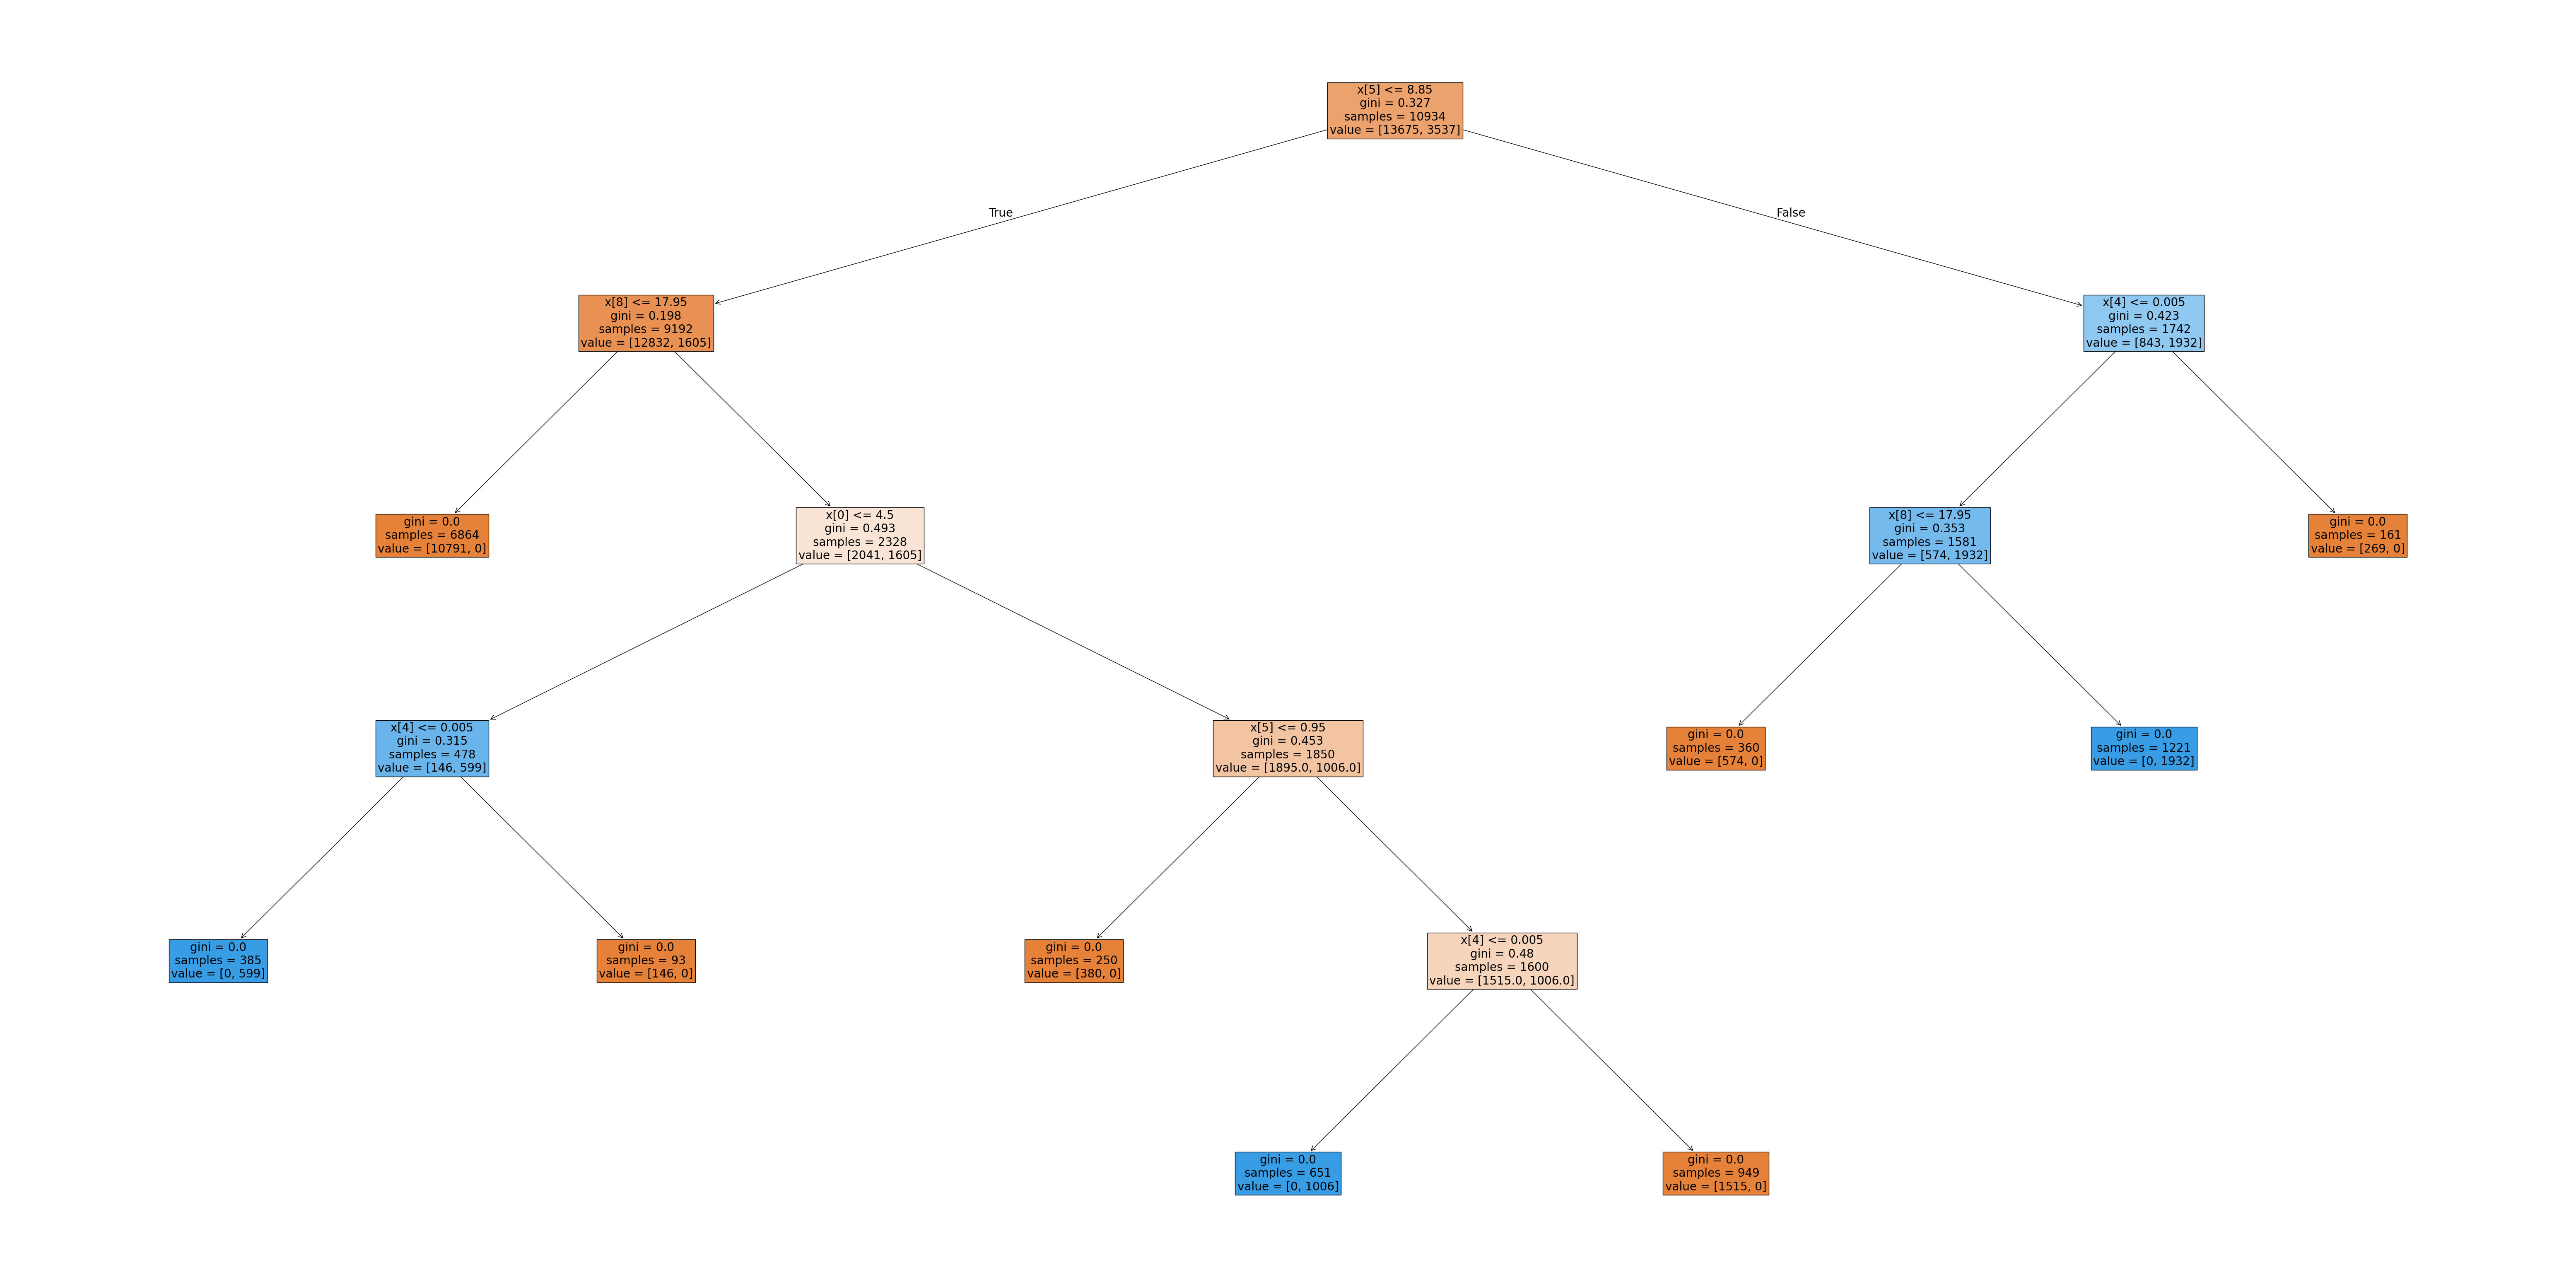

In [61]:
#Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

# Uncovering Feature Importance: Maastricht

In [64]:
#Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.03553488, 0.01299965, 0.01057049, 0.08764359, 0.32053825,
       0.11104729, 0.12434605, 0.02084269, 0.27647711])

In [66]:
#Create a list of weather features

MAAS_list = [feature.replace('MAASTRICHT_', '') for feature in maastricht_list]
MAAS_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [68]:
important = pd.Series(newarray, index = MAAS_list)
important

cloud_cover         0.035535
humidity            0.013000
pressure            0.010570
global_radiation    0.087644
precipitation       0.320538
sunshine            0.111047
temp_mean           0.124346
temp_min            0.020843
temp_max            0.276477
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


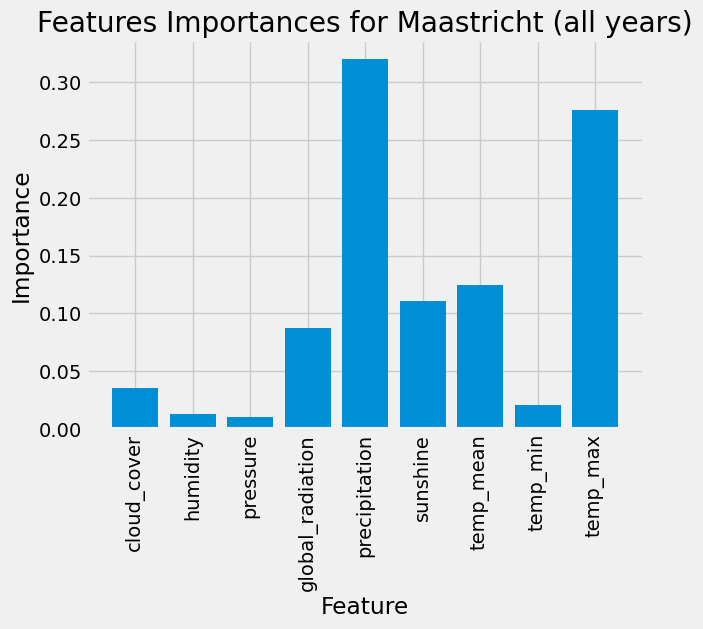

In [74]:
#Plot the results
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(MAAS_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, MAAS_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Maastricht (all years)');

plt.show()